In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time as time

from SimulationControl import SimControl

SimCon = SimControl()
SimCon.params["Notebook"] = 1
SimCon.params["simtime"] = 2000
SimCon.params["h"] = 0.1

t0 = time.time()
os.system(SimCon.Generate_Command())
t1 = time.time()

print(f"Time taken: {t1-t0:.2f}")


Time taken: 9.88


In [2]:
data = np.load("NotebookData.npy",allow_pickle=True).item()
STN = data["STN"]
GPe = data["GPe"]
data_dict = data["data"]

Text(0.72, 0.95, 'Mean $\\chi$: 0.420\nSTN FR:  34.38 \nGPe FR:  14.04 ')

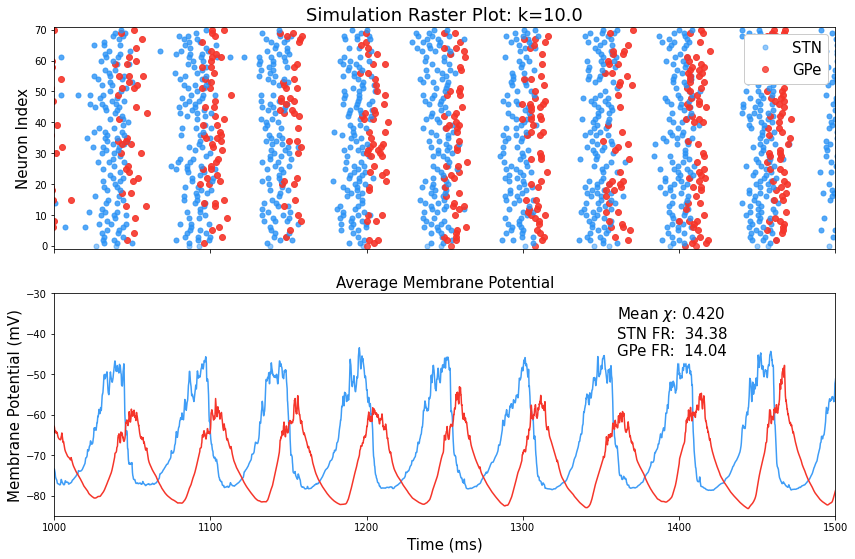

In [3]:
dt = SimCon.params["h"]
simtime = SimCon.params["simtime"]

def get_spike_trains(pop):
    main_lis = []
    for sp in pop.spiketrains:
        s_lis = [ float(i) for i in sp] 
        main_lis.append(np.array(s_lis))

    return main_lis

low_cutoff = int(500/dt) #number of segments corresponding to first 500ms

SLFP = np.array(STN.filter(name='soma(0.5).v')[0]).mean(axis=1)#(axis=1)
GLFP = np.array(GPe.filter(name='soma(0.5).v')[0]).mean(axis=1)


packed_dat = [{"SLFP": SLFP,"GLFP": GLFP,"STrain":get_spike_trains(STN),
               "GTrain":get_spike_trains(GPe),
               "Sync":np.sqrt(data_dict['STN synchrony']*data_dict['GPe synchrony']) ,
              "SMean":data_dict["SMean"],
               "GMean":data_dict["GMean"],
              }]
loc = 'dataOct21\\'
netname = data_dict['Network_type']
#name = f'S_{netname}_{n}_{data_dict["k"]}_{data_dict["p"]:5f}_{data_dict["recip"]:.5f}.npy'
#np.save(loc+name,packed_dat)
recovered_dat = packed_dat[0] #np.load(loc+name,allow_pickle=True)[0]


cols = '#2A92F5'
colg = '#F5352A'


k = data_dict["k"]
netlab = {'Regular':'k-Regular',  'Small_world': 'Small World','Spatial':'Nearest Neighbour',
          'Scale_free': 'Preferential Attachment','SBlock': 'Stochastic Block'}

SLFP = recovered_dat["SLFP"]
GLFP = recovered_dat["GLFP"]

STrain = recovered_dat["STrain"]
GTrain = recovered_dat["GTrain"]

sync = float(recovered_dat["Sync"])
textstr = r'Mean $\chi$: '+ f'{sync:>3.3f}' + f"\nSTN FR: {data_dict['SMean']:>6.2f} \nGPe FR: {data_dict['GMean']:>6.2f} " 

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=1,edgecolor='white')

# place a text box in upper left in axes coords

infigfontsize = 15
titlefontsize = 18

ilim = 70

x_axis = np.linspace(0,simtime,len(GLFP))

fig,ax = plt.subplots(2,1,figsize=[14,9],sharex=True)
#fig.suptitle(params["Network_type"])

for i, train in enumerate(zip(STrain,GTrain)):
    train1 = train[0]
    train2 = train[1]
    if i>ilim:
        break
    if i==0:
        ax[0].plot(train1, i*np.ones(len(train1)), 'o', color = cols,markersize=5, alpha=0.5, label='STN')
        ax[0].plot(train2, i*np.ones(len(train2)), 'o', color = colg,markersize=6, alpha=0.8, label='GPe')
    else:
        ax[0].plot(train1, i*np.ones(len(train1)), 'o', color = cols,markersize=5, alpha=0.8)
        ax[0].plot(train2, i*np.ones(len(train2)), 'o', color = colg,markersize=6, alpha=0.9)


#f'{netlab[data_dict["Network_type"]]} Network'
ax[0].set_title(f'Simulation Raster Plot: k={k}',fontsize=titlefontsize)
ax[0].set_ylabel("Neuron Index",fontsize=infigfontsize)
ax[0].set_xlim(1000,1500)
ax[0].set_ylim(-1,ilim+1)
ax[0].legend(fontsize=infigfontsize,loc='upper right',framealpha=1)
#ax[0].legend(fontsize=16,framealpha=1,shadow = True,borderpad=0.8,loc='upper right')

ax[1].plot(x_axis, SLFP, label = 'STN',color = cols, alpha=0.9)
ax[1].plot(x_axis, GLFP, label = 'GPe',color = colg, alpha=1)
ax[1].set_title('Average Membrane Potential',fontsize=infigfontsize)
ax[1].set_ylabel("Membrane Potential (mV)",fontsize=infigfontsize)
ax[1].set_xlabel("Time (ms)",fontsize=infigfontsize)
ax[1].set(ylim=[-85,-30,])
ax[1].text(0.72, 0.95, textstr, transform=ax[1].transAxes, color='k', fontsize=infigfontsize, verticalalignment='top', bbox=props)
# for i,trains in enumerate(GTrain):
#     ax.plot(trains, i*np.ones(len(trains)), 'o', color = 'r',markersize=5, alpha=0.8)


